# Samurai by the numbers
## by Tzuyu Chou (Cactuar)

In [26]:
from samurai import Samurai
from plotting import *

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb
from IPython.display import display
%matplotlib inline

## lvl 1-3 rotation

### Up to level 3, you only have one weaponskill... so use it.

In [27]:
sam = Samurai()

actions = [('Hakaze', sam.hakaze()),
           ('Hakaze', sam.hakaze()),
           ('Hakaze', sam.hakaze()),
           ('Hakaze', sam.hakaze()),
           ('Hakaze', sam.hakaze()),
           ('Hakaze', sam.hakaze()),
           ('Hakaze', sam.hakaze()),
           ('Hakaze', sam.hakaze()),
           ('Hakaze', sam.hakaze()),]

In [28]:
df0 = pd.DataFrame(actions, columns=['action', 'potency'])
df0['total potency'] = df0['potency'].cumsum(axis=0)
display(df0)

,action,potency,total potency
0,Hakaze,150.0,150.0
1,Hakaze,150.0,300.0
2,Hakaze,150.0,450.0
3,Hakaze,150.0,600.0
4,Hakaze,150.0,750.0
5,Hakaze,150.0,900.0
6,Hakaze,150.0,1050.0
7,Hakaze,150.0,1200.0
8,Hakaze,150.0,1350.0


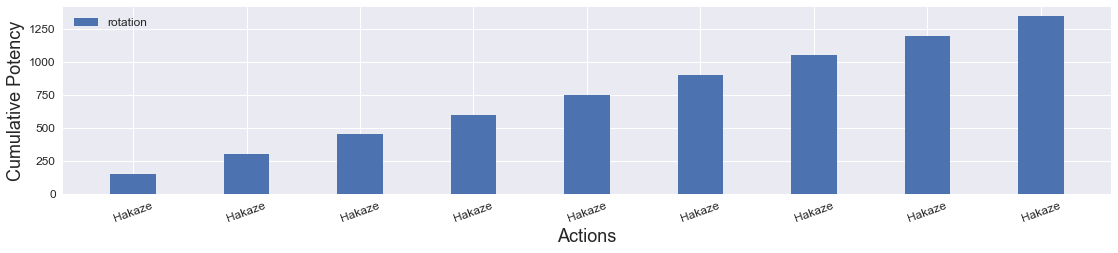

In [29]:
plot_potency(df0)

### Priority: Hakaze

## lvl 4-17 rotation

### At level 4, you gain the use of Jinpu, which combos from Hakaze and gives you your damage up buff. You'll definitely want to keep this buff up at all times and it should be simple enough with its 30s duration. The next weaponskill you obtain is Enbi, a ranged attack with a niche use. Level 6 grants you the defensive buff, Third Eye, and level 10 grants you the ability Ageha. Use Ageha on cooldown between weaponskills for additional damage.

In [30]:
sam = Samurai()

actions = [('Hakaze', sam.hakaze()),
           ('Jinpu', sam.jinpu()),
           ('Hakaze', sam.hakaze()),
           ('Jinpu', sam.jinpu()),
           ('Hakaze', sam.hakaze()),
           ('Jinpu', sam.jinpu()),
           ('Hakaze', sam.hakaze()),
           ('Jinpu', sam.jinpu()),
           ('Hakaze', sam.hakaze())]

In [31]:
df1 = pd.DataFrame(actions, columns=['action', 'potency'])
df1['total potency'] = df1['potency'].cumsum(axis=0)
display(df1)

,action,potency,total potency
0,Hakaze,150.0,150.0
1,Jinpu,322.0,472.0
2,Hakaze,172.5,644.5
3,Jinpu,322.0,966.5
4,Hakaze,172.5,1139.0
5,Jinpu,322.0,1461.0
6,Hakaze,172.5,1633.5
7,Jinpu,322.0,1955.5
8,Hakaze,172.5,2128.0


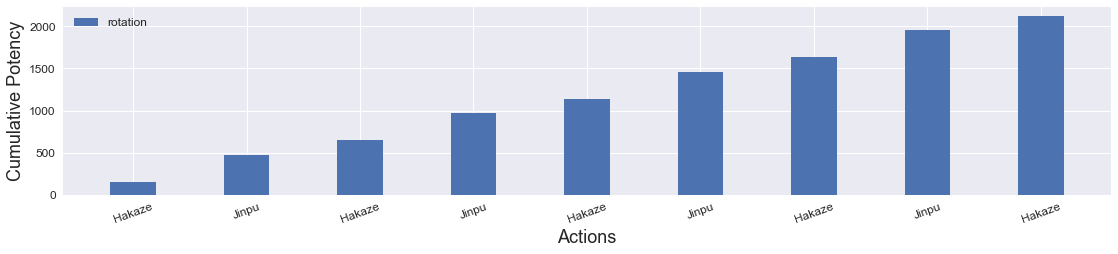

In [32]:
plot_potency(df1)

### How does this compare to the previous rotation?

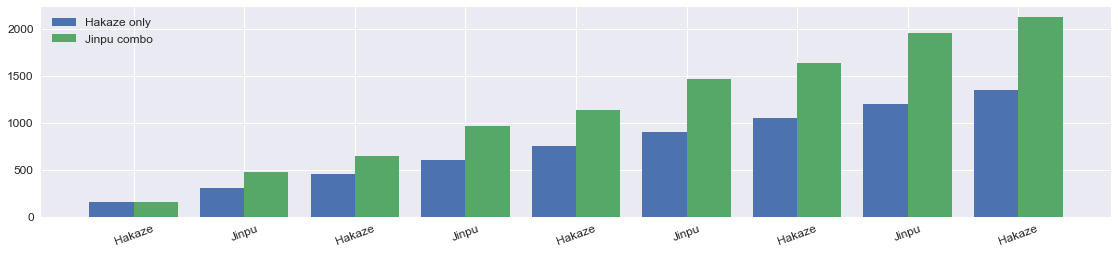

In [33]:
compare_potencies([df0, df1], ['Hakaze only', 'Jinpu combo'])

### You'll definitely want to use the Jinpu combo and keep the buff up.

### Priority: Jinpu 
### Filler: Jinpu combo

## lvl 18-29 rotation

### Level 18 sees the introduction of your haste buff, Shifu. When executed as a combo, Shifu grants you this buff for a duration of 30s in addition to the additional combo potency. At these levels, it's fairly close as to which buff takes priority, Shifu or Jinpu. However, with the introduction of Sen, you will definitely want to prioritize Shifu so that you may open your Sen more often to execute the powerful Iaijutsu more often.

** Note: the haste buff is modeled as a straight potency multiplier at this time since the discrete time model using timesteps of GCD does not account for the decreased GCD.

In [34]:
sam = Samurai()

actions = [('Hakaze', sam.hakaze()),
           ('Shifu', sam.shifu()),
           ('Hakaze', sam.hakaze()),
           ('Jinpu', sam.jinpu()),
           ('Hakaze', sam.hakaze()),
           ('Shifu', sam.shifu()),
           ('Hakaze', sam.hakaze()),
           ('Jinpu', sam.jinpu()),
           ('Hakaze', sam.hakaze())]

In [35]:
df2 = pd.DataFrame(actions, columns=['action', 'potency'])
df2['total potency'] = df2['potency'].cumsum(axis=0)
display(df2)

,action,potency,total potency
0,Hakaze,150.00,150.00
1,Shifu,308.00,458.00
2,Hakaze,165.00,623.00
3,Jinpu,354.20,977.20
4,Hakaze,189.75,1166.95
5,Shifu,354.20,1521.15
6,Hakaze,189.75,1710.90
7,Jinpu,354.20,2065.10
8,Hakaze,189.75,2254.85


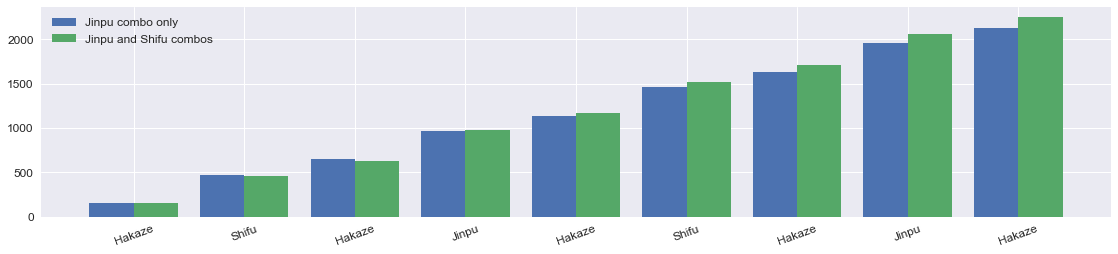

In [36]:
compare_potencies([df1, df2], ['Jinpu combo only', 'Jinpu and Shifu combos'])

#### Note: The Shifu buff is modeled as a 10% increase in potency per GCD, chosen arbitrarily. This explains the discrepancy for the first two GCDs. 

### Note that level 26 introduces your first AoE ability, Fuga. At this time, it does not combo to or from anything and deals 100 potency to all targets in a frontal cone. However, our Shifu/Jinpu combo rotation deals a hefty...

In [37]:
df2['total potency'][7] / 8

258.13749999999999

### average potency per GCD! Napkin math reveals that Fuga should do more potency per GCD for three or more targets. Should we put our Shifu and Jinpu buffs if they're not up before using Fuga? Depends on how long the encounter is.

In [38]:
dfs_buff = []
labels = []

for n_targets in range(3, 8):
    sam = Samurai()
    
    actions = [('Hakaze', sam.hakaze()),
               ('Shifu', sam.shifu()),
               ('Hakaze', sam.hakaze()),
               ('Jinpu', sam.jinpu()),
               ('Fuga', sam.fuga(n_targets)),
               ('Fuga', sam.fuga(n_targets)),
               ('Fuga', sam.fuga(n_targets)),
               ('Fuga', sam.fuga(n_targets)),
               ('Fuga', sam.fuga(n_targets))]
    
    df_temp = pd.DataFrame(actions, columns=['action', 'potency'])
    df_temp['total potency'] = df_temp['potency'].cumsum(axis=0)
    dfs_buff.append(df_temp)
    
    labels.append('%s targets' % n_targets)   

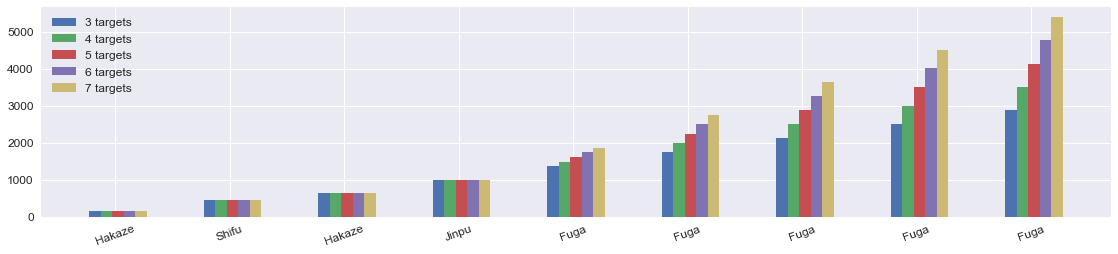

In [39]:
compare_n_potencies(dfs_buff, labels)

### For Fuga with no buffs:

In [40]:
dfs_no_buff = []
labels = []

for n_targets in range(3, 8):
    sam = Samurai()
    
    actions = [('Fuga', sam.fuga(n_targets)),
               ('Fuga', sam.fuga(n_targets)),
               ('Fuga', sam.fuga(n_targets)),
               ('Fuga', sam.fuga(n_targets)),
               ('Fuga', sam.fuga(n_targets)),
               ('Fuga', sam.fuga(n_targets)),
               ('Fuga', sam.fuga(n_targets)),
               ('Fuga', sam.fuga(n_targets)),
               ('Fuga', sam.fuga(n_targets))]
    
    df_temp = pd.DataFrame(actions, columns=['action', 'potency'])
    df_temp['total potency'] = df_temp['potency'].cumsum(axis=0)
    dfs_no_buff.append(df_temp)
    
    labels.append('%s targets' % n_targets)  

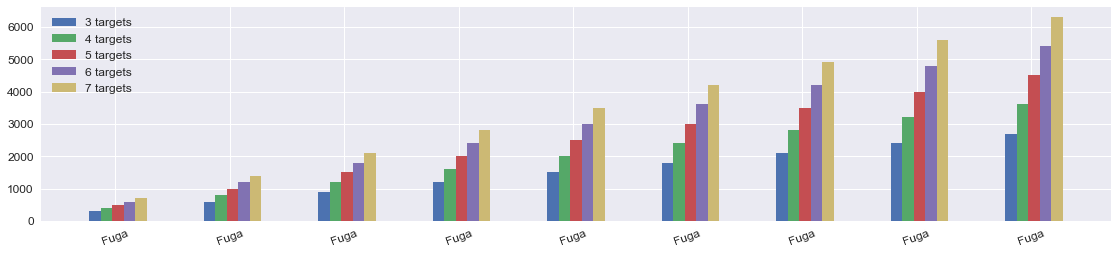

In [41]:
compare_n_potencies(dfs_no_buff, labels)

### The potency over four GCDs to put up Shifu and Jinpu is about 977. For $n$ targets, Fuga deals $4*n*100$ potency over that same time frame. The new potency per GCD with the buffs up is about $1.15*1.10*100=126.5$ potency times the number of targets.

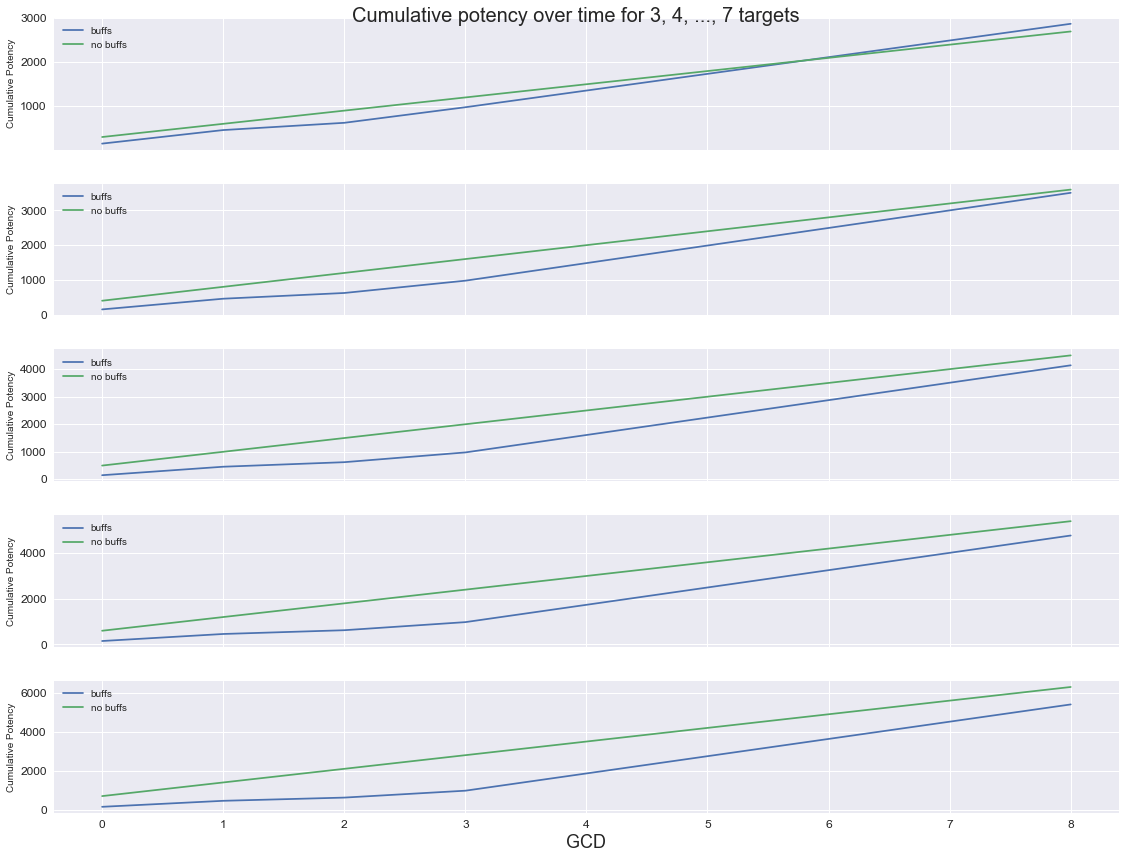

In [42]:
fig, axes = plt.subplots(nrows=len(dfs_buff), ncols=1, sharex=True, figsize=(16,12))
fig.tight_layout(pad=2)

for k, df in enumerate(dfs_buff): 
    ax = axes[k]
    
    ax.plot(df['total potency'], label='buffs')
    ax.plot(dfs_no_buff[k]['total potency'], label='no buffs')

    ax.set_ylabel('Cumulative Potency', fontsize=10)
    axes[-1].set_xlabel('GCD')
    ax.legend(loc='upper left', framealpha=0.5, prop={'size': 'small'})

fig.suptitle('Cumulative potency over time for 3, 4, ..., 7 targets')

### There are approximately ten GCDs after putting up your first buff, Shifu before you need to refresh it. For small mob counts, the crossover point where putting up buffs before using Fuga is more optimal occurs fairly early. However, as the number of targets increases, the upfront "cost" of putting the buffs up does not pay off. At these low levels, the pull sizes are likely to be small and depending on party composition, the AoE damage may not be high... so putting up buffs may win out (just watch out for the TP consumption!)

### Priority: Shifu > Jinpu. 
### Filler: Either combo to maintain the buffs.

### AoE: Shifu > Jinpu > Fuga for small groups. Fuga only for large groups (>6 or so)

## lvl 30-39 rotation

### Level 30 sees the introduction of your first Sen through the Gekko combo finisher (combo from Jinpu) and with it your first Iaijutsu, Higanbana. This powerful single-target weaponskill applies a 60s DoT in addition to initial damage for a total of 940 potency over its duration.

In [43]:
sam = Samurai()

actions = [('Hakaze', sam.hakaze()),
           ('Shifu', sam.shifu()),
           ('Hakaze', sam.hakaze()),
           ('Jinpu', sam.jinpu()),
           ('Gekko', sam.gekko()),
           ('Higanbana', sam.higanbana()),
           ('Hakaze', sam.hakaze()),
           ('Jinpu', sam.jinpu()),
           ('Gekko', sam.gekko())]

In [44]:
df3 = pd.DataFrame(actions, columns=['action', 'potency'])
df3['total potency'] = df3['potency'].cumsum(axis=0)
display(df3)

,action,potency,total potency
0,Hakaze,150.00,150.00
1,Shifu,308.00,458.00
2,Hakaze,165.00,623.00
3,Jinpu,354.20,977.20
4,Gekko,506.00,1483.20
5,Higanbana,1189.10,2672.30
6,Hakaze,189.75,2862.05
7,Jinpu,354.20,3216.25
8,Gekko,506.00,3722.25


### Note: the total potency of the DoT is baked in. 

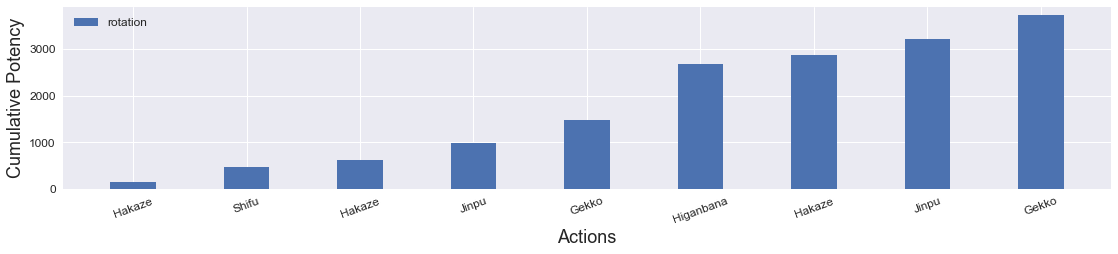

In [45]:
plot_potency(df3)

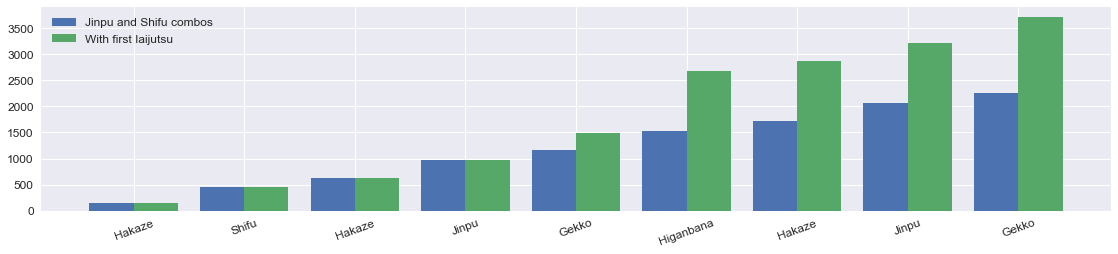

In [46]:
compare_potencies([df2, df3], ['Jinpu and Shifu combos', 'With first Iaijutsu'])

### At this point, the average potency of the Gekko combo is $400+280+150=830/3=~276.66$ before buffs. The average potency of the Shifu combo is $150+280=430/2=215$ before buffs. Therefore, Higanbana is more optimal than the Gekko combo after two DoT ticks. Since it takes approximately 3-4 GCDs to reapply Higanbana (Gekko combo plus cast time of Higanbana), Higanbana will always be optimal to clip in single target situations. In small mob groups, applying Higanbana to each target may also be optimal. (Need to do analysis.)

### Level 35 introduces an AoE combo with Mangetsu (combo from Fuga). This weaponskill also opens the Getsu Sen. This combo is an average of 150 potency per target over two GCDs. Because Mangetsu opens the Getsu Sen, this allows you to apply Higanbana to individual targets in the group. Depending on group size and encounter duration, this may be optimal. 

### Quick napkin math indicates that groups of 5 or larger may be the decision boundary. At five targets, the AoE combo averages 750 potency per GCD. This is equivalent to about 14-15 DoT ticks from Higanbana, or approximately 42-48 seconds after Higanbana application, depending on server ticks. That is typically longer than most pulls. 

### In terms of buffing before executing the Mangetsu combo, the increased average potency of the AoE combo further penalizes the upfront cost of getting Jinpu and Shifu up. This increases the encounter duration required for buffing to be worth it. This points further towards skipping buffs, especially for sizeable mob packs. (More analysis?)

### Priority: Shifu > Jinpu
### Filler: Gekko combo > Higanbana
### AoE: Mangetsu combo + Higanbana, depending on group size and encounter duration

## lvl 40-49 rotation

### Level 40 introduces the Kasha combo finisher (combo from Shifu). Equal in potency to the Gekko finisher, this weaponskill when comboed opens the Ka Sen. This leads to a maximum of two Sen open at any given time and also unlocks the use of the Iaijutsu, Tenka Goken. This powerful, point blank AoE weaponskill scales its potency depending on the number of targets up to a maximum of 360 potency for the first target hit. In AoE situations, this is likely Iaijutsu of choice due to its instantaneous damage but is, once again, subject to target count and encounter duration.

### Level 45 introduces the Oka AoE combo (combo from Fuga). This finisher is equal in potency to the Mangetsu finisher, but similarly to Kasha for single target, opens the Ka Sen instead. This opens the AoE rotation of alternating combos to open Ka and Getsu in order to use Tenka Goken.

## lvl 50 rotation

### Level 50 unlocks the final weaponskill, Yukikaze, a combo finisher to open the final Sen, Setsu. It combos from Hakaze so it is a two hit combo contrary to Gekko and Kasha (with reduced potency to compensate). Level 50 also confers the Meikyo Shisui ability, a cooldown that allows you to execute up to 3 combo abilities without meeting combo prerequisites. This may be used, for example, to quickly get Jinpu and Shifu buffs up or to open up all three Sen in a fraction of the time as normal.

### Furthermore, the opening of the final Sen unlocks the final Iaijutsu, Midare Setsugekka. This powerful single target nuke gives the opportunity in single target situations to deal massive damage without having to clip Higanbana.

## lvl 50-70 rotation

### With all weaponskills acquired at level 50, the remainder of the levels up to 70 fill out the Hissatsu mechanic. These abilities are spenders for the Kenki gauge and add personal utility, buffs, or extra damage. I'm assuming a lvl 50 trait adds the Kenki accumulation. (Kenki mastery I). Kenki mastery II is a lvl 62 trait that increases the Kenki gauage when executing all weaponskills excluding Iaijutsu. Prior to that is it from autoattacks? TBD.

### lvl 52: Hissatsu: Kaiten increases next weaponskill damage by 50%. Five second recast. Use on Higanbana > Midare Setsugekka > Tenka Goken, depending on situation.

### lvl 54: Hissatsu: Gyoten is a gap closer with potency.

### lvl 56: Hissatsu: Yaten is a disengage backflip. It grants Enhanced Enbi which lets you use a high potency, ranged followup to maintain uptime.

### lvl 58: Merciful Eyes is a self heal that may be used after using Third Eye. Share recast with Starry Eyes.

### lvl 60: Meditate is an ability that increases your Kenki gauge during extended periods of downtime.

### lvl 62: Hissatsu: Shinten is a high potency filler ability with short recast. It should be used to dump Kenki when it is not needed for Hissatsu: Kaiten. This is likely after Hissatsu: Kaiten has already been applied to Higanbana and Midare Setsugekka and you are building up for another Midare Setsugekka.

### lvl 64: Hissatsu: Kyuten is analogous to Hissatsu: Shinten but for PBAoE. However, since Tenka Goken only requires two Sen, maybe you don't need to dump Kenki unless you need the burst?

### lvl 66: Starry Eyes is ability filler usable after Third Eye. It costs the same amount of Kenki as Hissatsu: Shinten while being 2/3 of the potency so... idk?

### lvl 68: Hagakure is a 40s cooldown ability that converts open Sen to Kenki at a rate of 1:20. This will be interesting to look at.

### lvl 70: Hissatsu: Guren is a line AoE that deals massive damage -- 800 potency for the first hit, 600 for the next hit, and 400 for any remaining. Literally the strongest action in the game other than Kaiten buffed Iaijutsu. Will have to look at Kenki generation to see its use, especially in single target situations.